In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("winequality-red.csv")
df[0:5]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [9]:
idx_1 = np.where(df.quality>5)
idx_0 = np.where(df.quality<6)

In [10]:
for i in idx_1:
    df.iloc[i,11]=1

In [11]:
for i in idx_0:
    df.iloc[i,11]=0

In [12]:
df.quality.unique()

array([0, 1], dtype=int64)

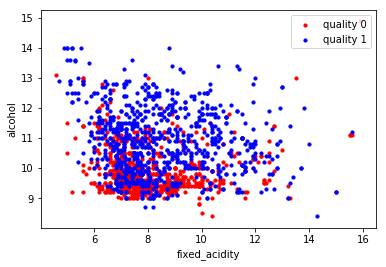

In [13]:
plt.scatter(df.iloc[idx_0].fixed_acidity, df.iloc[idx_0].alcohol, s=10, c='r', marker="o", label='quality 0')
plt.scatter(df.iloc[idx_1].fixed_acidity, df.iloc[idx_1].alcohol, s=10, c='b', marker="o", label='quality 1')
plt.ylabel('alcohol')
plt.xlabel('fixed_acidity')
plt.legend()
plt.show()

In [14]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [15]:
feature_df=df.iloc[:,0:11]
X = np.asarray(feature_df)
X[0:5]

array([[7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00],
       [7.800e+00, 8.800e-01, 0.000e+00, 2.600e+00, 9.800e-02, 2.500e+01,
        6.700e+01, 9.968e-01, 3.200e+00, 6.800e-01, 9.800e+00],
       [7.800e+00, 7.600e-01, 4.000e-02, 2.300e+00, 9.200e-02, 1.500e+01,
        5.400e+01, 9.970e-01, 3.260e+00, 6.500e-01, 9.800e+00],
       [1.120e+01, 2.800e-01, 5.600e-01, 1.900e+00, 7.500e-02, 1.700e+01,
        6.000e+01, 9.980e-01, 3.160e+00, 5.800e-01, 9.800e+00],
       [7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00]])

In [16]:
df['quality']=df['quality'].astype('int')
y=np.asarray(df['quality'])
y[0:5]

array([0, 0, 0, 1, 0])